In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

2023-07-19 18:38:53.124238: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_path = r'/Users/prayer/Library/CloudStorage/GoogleDrive-rohitsainissn@gmail.com/My Drive/jupyter notebook/projects for CV/xray/train'
valid_path = r'/Users/prayer/Library/CloudStorage/GoogleDrive-rohitsainissn@gmail.com/My Drive/jupyter notebook/projects for CV/xray/val'
test_path = r'G/Users/prayer/Library/CloudStorage/GoogleDrive-rohitsainissn@gmail.com/My Drive/jupyter notebook/projects for CV/xray/test'

In [3]:
vgg = VGG16(input_shape=[224, 224,3], weights='imagenet', include_top=False)

In [4]:
for layer in vgg.layers:
  layer.trainable = False

In [5]:
folders = glob( r'/Users/prayer/Library/CloudStorage/GoogleDrive-rohitsainissn@gmail.com/My Drive/jupyter notebook/projects for CV/xray/train/*')

In [6]:
folders

['/Users/prayer/Library/CloudStorage/GoogleDrive-rohitsainissn@gmail.com/My Drive/jupyter notebook/projects for CV/xray/train/PNEUMONIA',
 '/Users/prayer/Library/CloudStorage/GoogleDrive-rohitsainissn@gmail.com/My Drive/jupyter notebook/projects for CV/xray/train/NORMAL']

In [7]:
x = Flatten()(vgg.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
cv_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
cv_set = cv_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [13]:
r = model.fit(
  training_set,
  validation_data=cv_set,
  epochs=6,
  steps_per_epoch=len(training_set),
  validation_steps=len(cv_set)
)

Epoch 1/6


2023-07-19 18:38:58.945523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


163/163 [==============================] - ETA: 0s - loss: 0.3455 - accuracy: 0.9112 

2023-07-19 19:20:36.488023: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


163/163 [==============================] - 2502s 15s/step - loss: 0.3455 - accuracy: 0.9112 - val_loss: 1.5712 - val_accuracy: 0.6875
Epoch 2/6
163/163 [==============================] - 1783s 11s/step - loss: 0.1337 - accuracy: 0.9530 - val_loss: 0.5176 - val_accuracy: 0.7500
Epoch 3/6
163/163 [==============================] - 1825s 11s/step - loss: 0.1100 - accuracy: 0.9599 - val_loss: 0.3578 - val_accuracy: 0.7500
Epoch 4/6
163/163 [==============================] - 1772s 11s/step - loss: 0.0873 - accuracy: 0.9672 - val_loss: 0.3986 - val_accuracy: 0.7500
Epoch 5/6
163/163 [==============================] - 2686s 17s/step - loss: 0.0964 - accuracy: 0.9653 - val_loss: 0.6591 - val_accuracy: 0.7500
Epoch 6/6
163/163 [==============================] - 1760s 11s/step - loss: 0.0831 - accuracy: 0.9680 - val_loss: 0.3570 - val_accuracy: 0.8125


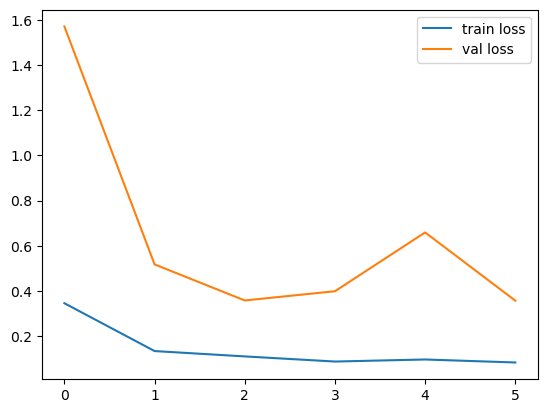

<Figure size 640x480 with 0 Axes>

In [14]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


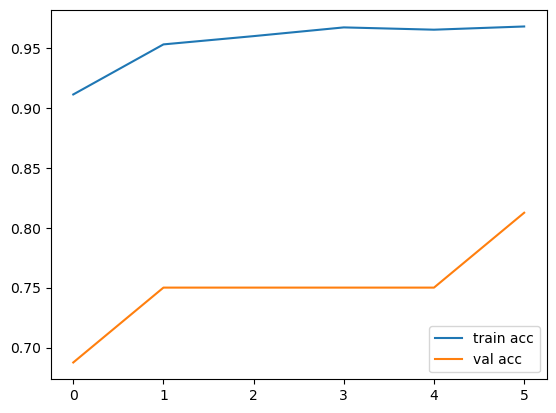

<Figure size 640x480 with 0 Axes>

In [15]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
from keras.models import load_model

model.save('model_vgg19.h5')